In [1]:
import matplotlib.pyplot as plt
import pyart
import pandas as pd
import geopandas as gpd

%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



(9360, 1832)

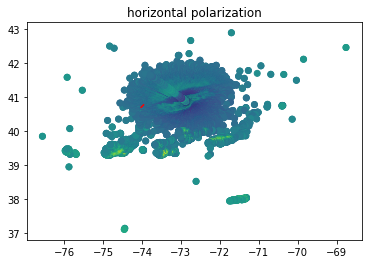

In [2]:
radar = pyart.io.read_nexrad_archive("data/2017-09/01/KOKX20170901_000243_V06.ar2v")
#radar.projection = {'_include_lon_0_lat_0': True, 'init': 'epsg:4236'}
min_lat = 40.696417
max_lat = 40.766791
min_lon = -74.022494
max_lon = -73.959454

lats = radar.gate_latitude['data']
lons = radar.gate_longitude['data']
vals = radar.get_field(0, 'reflectivity')
x = radar.gate_x['data']
y = radar.gate_y['data']
z = radar.gate_z['data']

pc = plt.scatter(lons[:720].reshape(-1), lats[:720].reshape(-1), c=vals.reshape(-1))
fig = pc.get_figure()
ax = fig.get_axes()[0]
ax.plot([min_lon, max_lon], [min_lat, max_lat], c='red')
ax.set_title("horizontal polarization")

x.shape

Text(0.5,1,'vertical polarization')

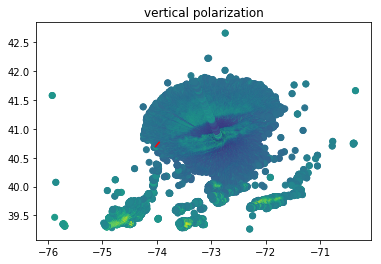

In [3]:


fig = pc.get_figure()
fig.get_axes()

vals = radar.get_field(1, 'reflectivity')
pc = plt.scatter(lons[720:1440].reshape(-1), lats[720:1440].reshape(-1), c=vals.reshape(-1))
fig = pc.get_figure()
ax = fig.get_axes()[0]
ax.plot([min_lon, max_lon], [min_lat, max_lat], c='red')
ax.set_title("vertical polarization")

### Docs 
- Methodology for getting the x/y/z values: http://arm-doe.github.io/pyart/dev/user_reference/generated/pyart.core.antenna_to_cartesian.html#pyart.core.antenna_to_cartesian

- Coordinate transform used: http://arm-doe.github.io/pyart/dev/user_reference/generated/pyart.core.Radar.html#pyart.core.Radar



199

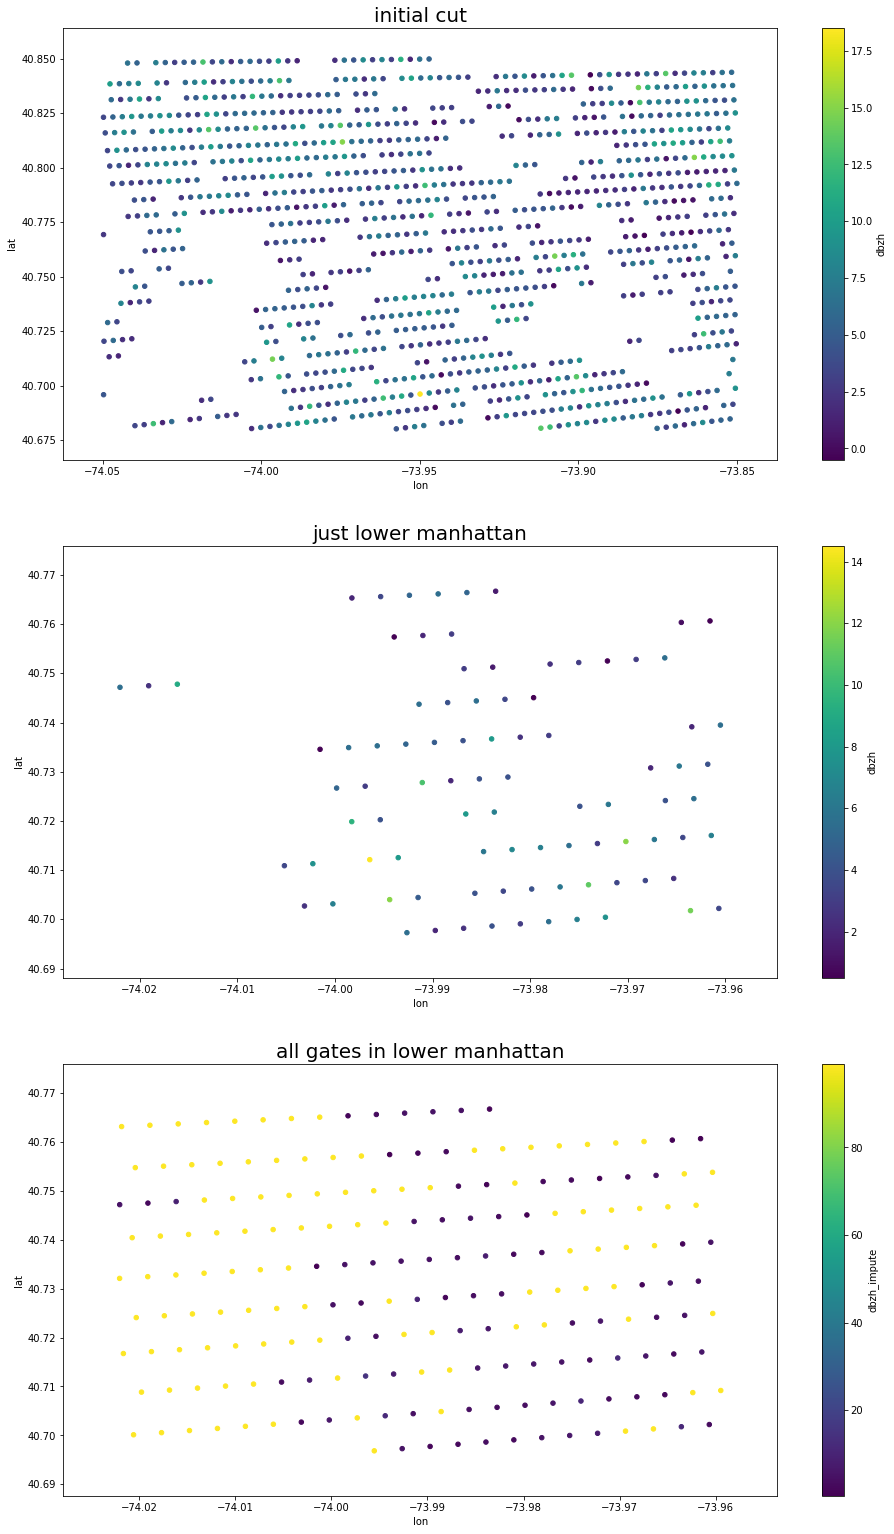

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 27))
hscan_df = pd.DataFrame({"lon": lons[:720].reshape(-1), 
                         "lat": lats[:720].reshape(-1), 
                         "dbzh": vals[:720].reshape(-1),
                         "x": x[:720].reshape(-1),
                         "y": y[:720].reshape(-1), 
                         "z": z[:720].reshape(-1), 
                         "alt": radar.gate_altitude['data'][:720].reshape(-1)})
hscan_df["dbzh_impute"] = hscan_df['dbzh'].fillna(99)
hscan_initial_cut = hscan_df[(hscan_df['lat'] >= 40.68 ) & (hscan_df['lat'] <= 40.85) &
        (hscan_df['lon'] >= -74.05) & (hscan_df['lon'] <= -73.85)]

hscan_lower_manhattan = hscan_df[(hscan_df['lat'] >= 40.696417 ) & (hscan_df['lat'] <= 40.766791) &
        (hscan_df['lon'] >= -74.022494) & (hscan_df['lon'] <= -73.959454)]
hscan_initial_cut.plot('lon', 'lat', c='dbzh', kind='scatter', ax=ax1,  cmap='viridis')
hscan_lower_manhattan.plot('lon', 'lat', c='dbzh', kind='scatter', ax=ax2,  cmap='viridis')
ax1.set_title("initial cut", fontsize=20)
ax2.set_title("just lower manhattan", fontsize=20)

hscan_lower_manhattan.plot('lon', 'lat', c='dbzh_impute', kind='scatter', ax=ax3,  cmap='viridis')
ax3.set_title("all gates in lower manhattan", fontsize=20)
len(hscan_lower_manhattan)

245.51465301355347

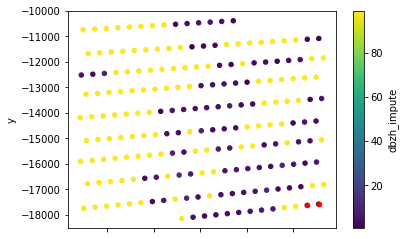

In [17]:
ax = hscan_lower_manhattan.plot('x', 'y', c='dbzh_impute', kind='scatter',  cmap='viridis')
hscan_lower_manhattan.iloc[[0, 1]].plot('x', 'y', c='red', kind='scatter', ax=ax)
import numpy as np
np.abs(hscan_lower_manhattan.iloc[0].x - hscan_lower_manhattan.iloc[1].x)
#ax.get_xticks()

(772.1157297191166, 727.3597842539966)

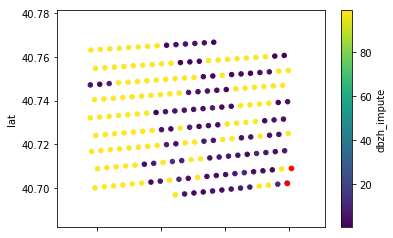

In [13]:
ax = hscan_lower_manhattan.plot('lon', 'lat', c='dbzh_impute', kind='scatter',  cmap='viridis')
hscan_lower_manhattan.iloc[[0, 13]].plot('lon', 'lat', c='red', kind='scatter', ax=ax)
import numpy as np
np.abs(hscan_lower_manhattan.iloc[0].y - hscan_lower_manhattan.iloc[13].y), np.abs(hscan_lower_manhattan.iloc[0].y - hscan_lower_manhattan.iloc[14].y)

count     199.000000
mean     1440.884422
std        30.427953
min      1382.000000
25%      1417.000000
50%      1442.000000
75%      1467.000000
max      1502.000000
Name: alt, dtype: float64

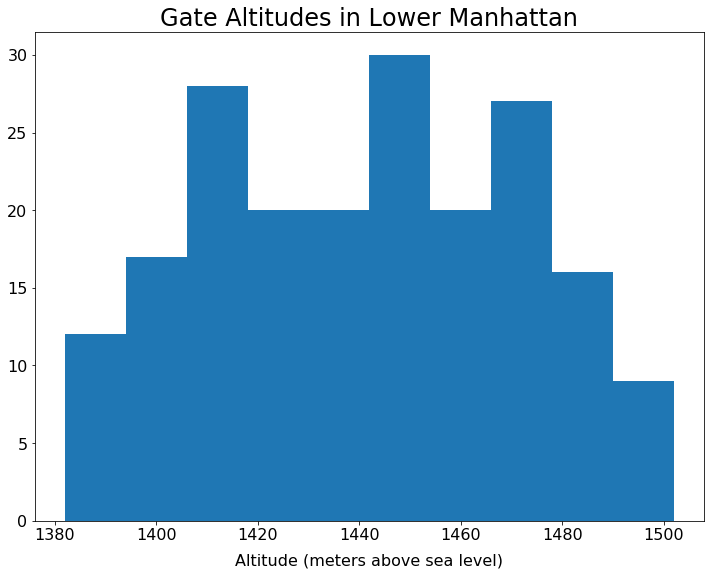

In [21]:
ax = hscan_lower_manhattan.alt.hist(figsize=(12, 9))
ax.set_title("Gate Altitudes in Lower Manhattan", fontsize=24)
ax.grid(False)
ax.set_xticklabels(map(int, ax.get_xticks()), fontsize=16)
ax.set_xlabel("Altitude (meters above sea level)", fontsize=16, labelpad=10)
ax.set_yticklabels(map(int, ax.get_yticks()), fontsize=16)
hscan_lower_manhattan.alt.describe()

In [32]:
hscan_lower_manhattan.head()

,lon,lat,dbzh,x,y,z,alt,dbzh_impute
1099568,-73.960670,40.702224,3.5,-92451.820189,-17580.281702,1342.0,1402.0,3.5
1099569,-73.963575,40.701776,11.5,-92697.334842,-17626.967822,1347.0,1407.0,11.5
1099570,-73.966480,40.701329,NaN,-92942.841820,-17673.652482,1352.0,1412.0,99.0
1099571,-73.969385,40.700881,NaN,-93188.348798,-17720.337143,1357.0,1417.0,99.0
1099572,-73.972291,40.700433,7.5,-93433.871126,-17767.024722,1362.0,1422.0,7.5


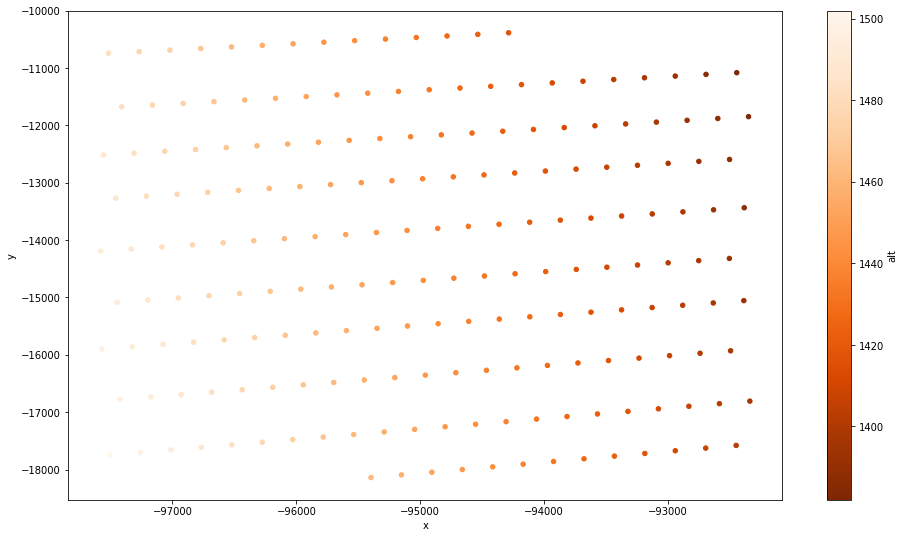

In [37]:
hscan_lower_manhattan.plot('x', 'y', c='alt', 
                           kind='scatter', figsize=(16, 9),  cmap='Oranges_r', 
                           sharex=False) # quick hack for xticks


In [70]:
radar.get_start(1) , radar.get_end(1)
radar.scan_rate?

In [3]:
display = pyart.graph.RadarDisplay(radar.extract_sweeps([0]))


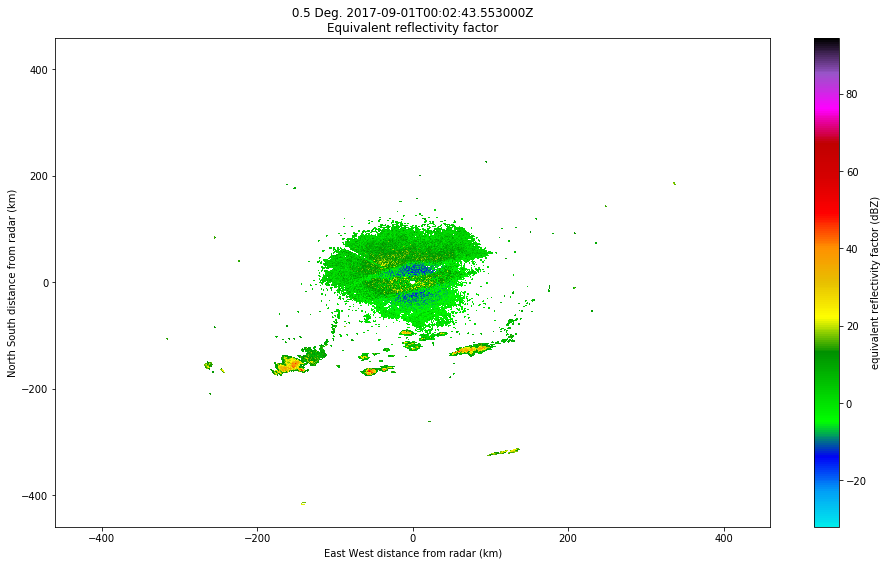

In [4]:
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 9))
display.plot_ppi('reflectivity', ax=ax1)
#display.plot('reflectivity', ax=ax2)

In [61]:
radar.elevation

{'units': 'degrees',
 'standard_name': 'beam_elevation_angle',
 'long_name': 'elevation_angle_from_horizontal_plane',
 'axis': 'radial_elevation_coordinate',
 'comment': 'Elevation of antenna relative to the horizontal plane',
 'data': array([0.49987793, 0.49987793, 0.49987793, ..., 6.38855   , 6.38855   ,
        6.38855   ], dtype=float32)}

In [57]:
radar.nrays, radar.nsweeps, radar.ngates

(9360, 16, 1832)

In [98]:
radar.fields

{'differential_reflectivity': {'units': 'dB',
  'standard_name': 'log_differential_reflectivity_hv',
  'long_name': 'log_differential_reflectivity_hv',
  'valid_max': 7.9375,
  'valid_min': -7.875,
  'coordinates': 'elevation azimuth range',
  '_FillValue': -9999.0,
  'data': masked_array(
    data=[[5.25, 5.875, 5.875, ..., --, --, --],
          [4.8125, 6.375, 6.25, ..., --, --, --],
          [4.6875, 5.5625, 0.5, ..., --, --, --],
          ...,
          [3.75, 3.625, 3.4375, ..., --, --, --],
          [6.125, 0.75, 4.6875, ..., --, --, --],
          [-1.3125, -2.875, 7.9375, ..., --, --, --]],
    mask=[[False, False, False, ...,  True,  True,  True],
          [False, False, False, ...,  True,  True,  True],
          [False, False, False, ...,  True,  True,  True],
          ...,
          [False, False, False, ...,  True,  True,  True],
          [False, False, False, ...,  True,  True,  True],
          [False, False, False, ...,  True,  True,  True]],
    fill_value=1e+20

In [54]:
radar.projection

{'proj': 'pyart_aeqd', '_include_lon_0_lat_0': True}

In [55]:
radar.instrument_parameters

{'unambiguous_range': {'units': 'meters',
  'comments': 'Unambiguous range',
  'meta_group': 'instrument_parameters',
  'long_name': 'Unambiguous range',
  'data': array([466000., 466000., 466000., ..., 117000., 117000., 117000.],
        dtype=float32)},
 'nyquist_velocity': {'units': 'meters_per_second',
  'comments': 'Unambiguous velocity',
  'meta_group': 'instrument_parameters',
  'long_name': 'Nyquist velocity',
  'data': array([ 8.4 ,  8.4 ,  8.4 , ..., 33.44, 33.44, 33.44], dtype=float32)}}

In [56]:
radar.radar_calibration

In [7]:
min_lat = 40.696417
max_lat = 40.766791
min_lon = -74.022494
max_lon = -73.959454

lower_mn = gpd.read_file("data/pluto/MNMapPLUTO.shp")
lower_mn = lower_mn.to_crs(epsg=4326)


/home/cusp/clm633/.conda/envs/pyart/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(445.259,0.5,'')

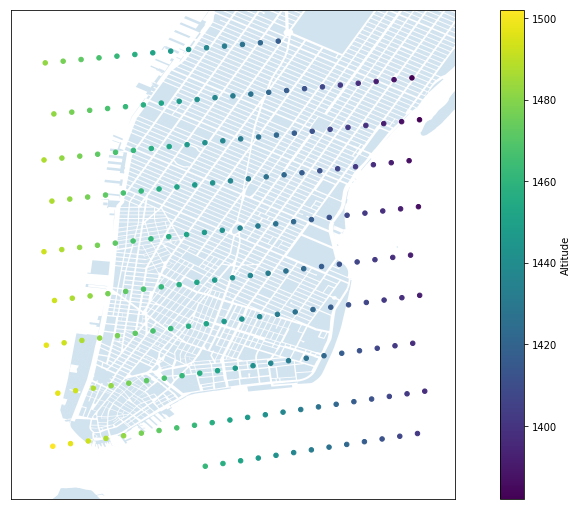

In [20]:
hscan_lower_manhattan["Altitude"] = hscan_lower_manhattan['alt']
ax = hscan_lower_manhattan.plot('lon', 'lat', c='Altitude', 
                                kind='scatter',  cmap='viridis', zorder=2, figsize=(16, 9), fontsize=14)
lower_mn.plot(ax=ax, zorder=1, alpha=.2)
ax.set_ylim([min_lat - .005, max_lat + .005])
ax.set_xlim([min_lon - .005, max_lon + .005])
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.set_yticks([])
ax.set_ylabel("")

197

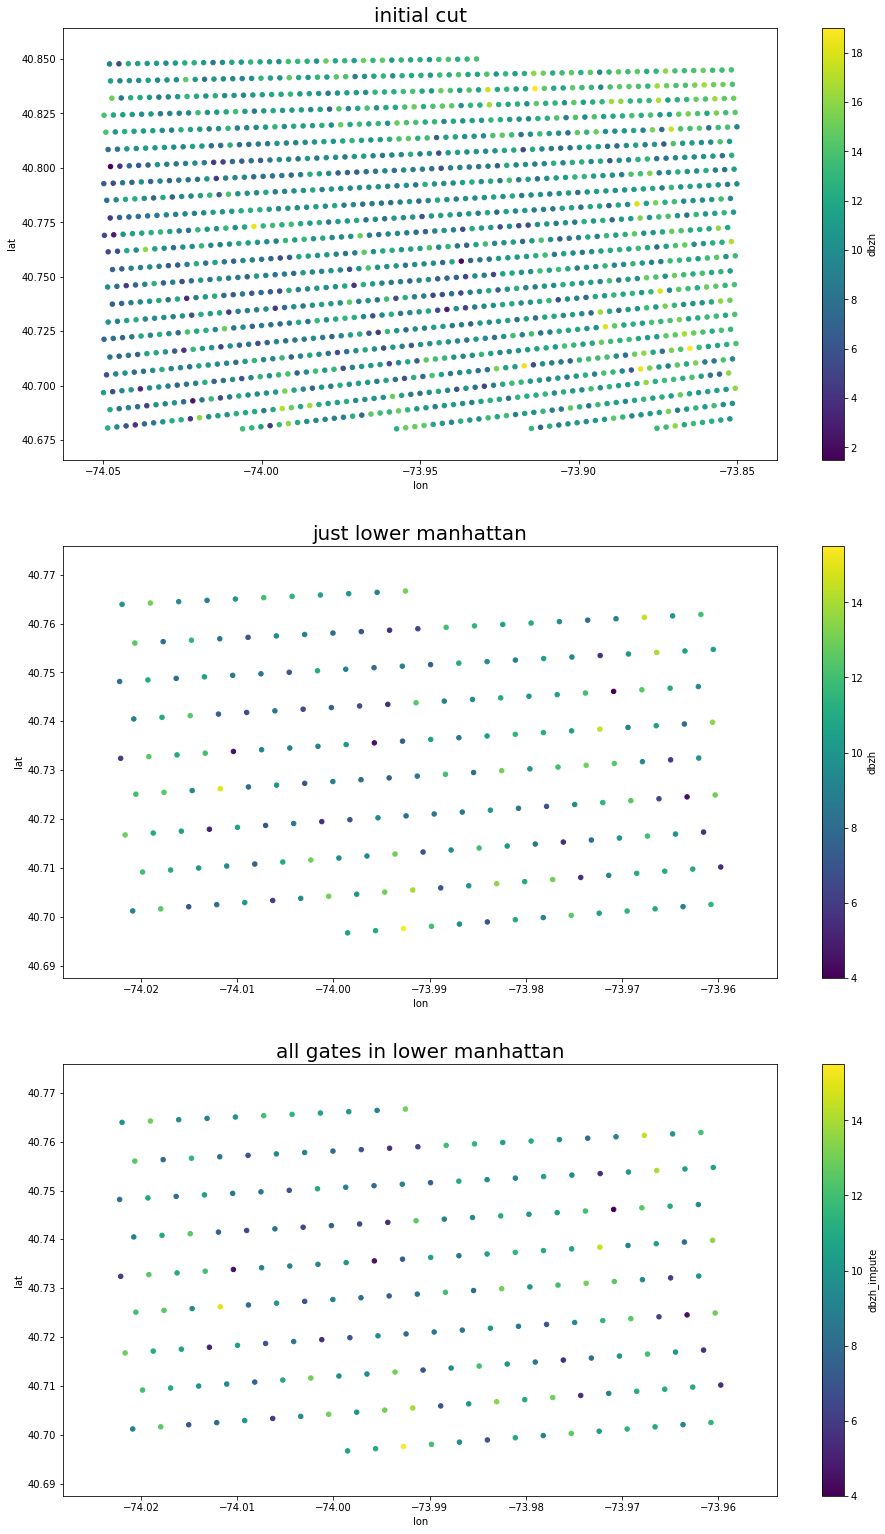

In [26]:
radar2 = pyart.io.nexrad_archive.read_nexrad_archive("data/09/29/KOKX20170929_000041_V06.ar2v")
lats = radar2.gate_latitude['data']
lons = radar2.gate_longitude['data']
vals = radar2.get_field(0, 'reflectivity')
x = radar2.gate_x['data']
y = radar2.gate_y['data']
z = radar2.gate_z['data']
alt = radar2.gate_altitude['data']
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 27))
hscan_df = pd.DataFrame({"lon": lons[:720].reshape(-1), 
                         "lat": lats[:720].reshape(-1), 
                         "dbzh": vals[:720].reshape(-1),
                         "x": x[:720].reshape(-1),
                         "y": y[:720].reshape(-1), 
                         "z": z[:720].reshape(-1), 
                         "alt": alt[:720].reshape(-1)})
hscan_df["dbzh_impute"] = hscan_df['dbzh'].fillna(99)
hscan_initial_cut = hscan_df[(hscan_df['lat'] >= 40.68 ) & (hscan_df['lat'] <= 40.85) &
        (hscan_df['lon'] >= -74.05) & (hscan_df['lon'] <= -73.85)]

hscan_lower_manhattan = hscan_df[(hscan_df['lat'] >= 40.696417 ) & (hscan_df['lat'] <= 40.766791) &
        (hscan_df['lon'] >= -74.022494) & (hscan_df['lon'] <= -73.959454)]
hscan_initial_cut.plot('lon', 'lat', c='dbzh', kind='scatter', ax=ax1,  cmap='viridis')
hscan_lower_manhattan.plot('lon', 'lat', c='dbzh', kind='scatter', ax=ax2,  cmap='viridis')
ax1.set_title("initial cut", fontsize=20)
ax2.set_title("just lower manhattan", fontsize=20)

hscan_lower_manhattan.plot('lon', 'lat', c='dbzh_impute', kind='scatter', ax=ax3,  cmap='viridis')
ax3.set_title("all gates in lower manhattan", fontsize=20)
len(hscan_lower_manhattan)

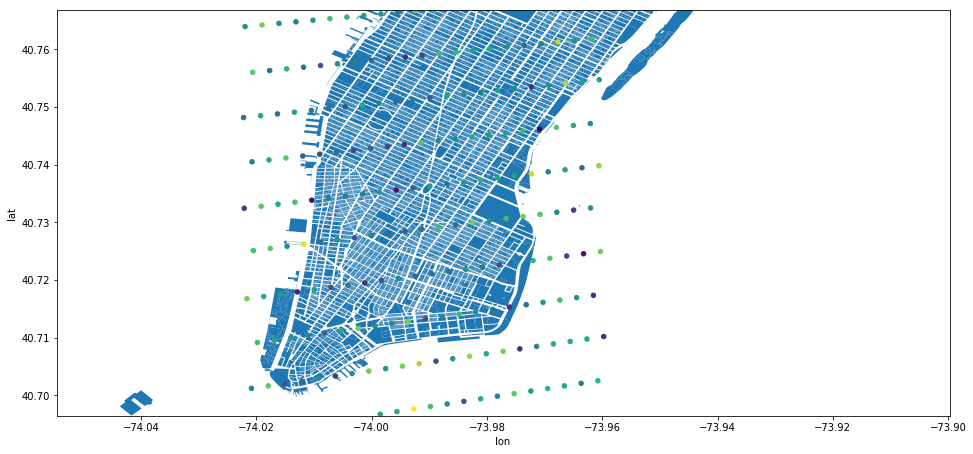

In [27]:
ax = lower_mn.plot(figsize=(16, 9))
ax.set_ylim([min_lat, max_lat])
hscan_lower_manhattan.plot('lon', 'lat', c='dbzh_impute', kind='scatter', ax=ax,  cmap='viridis', colorbar=False)


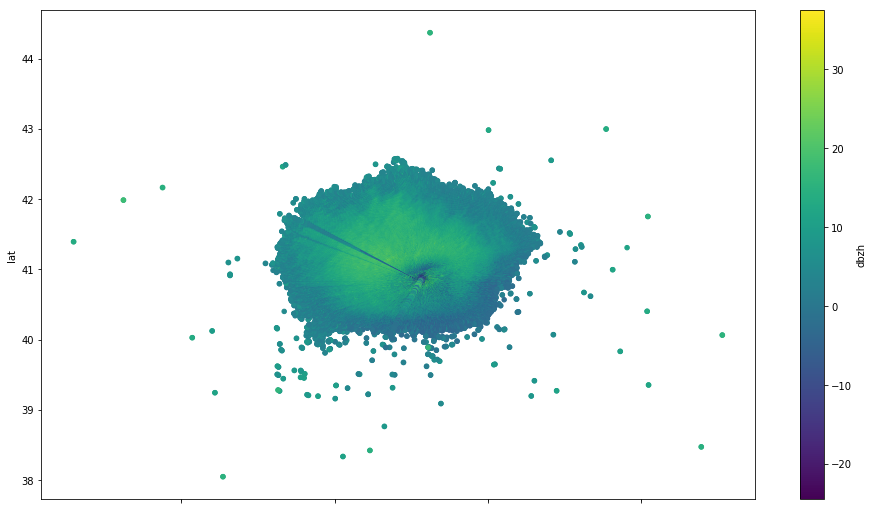

In [28]:
hscan_df.plot('lon', 'lat', c='dbzh', kind='scatter', figsize=(16, 9),  cmap='viridis')


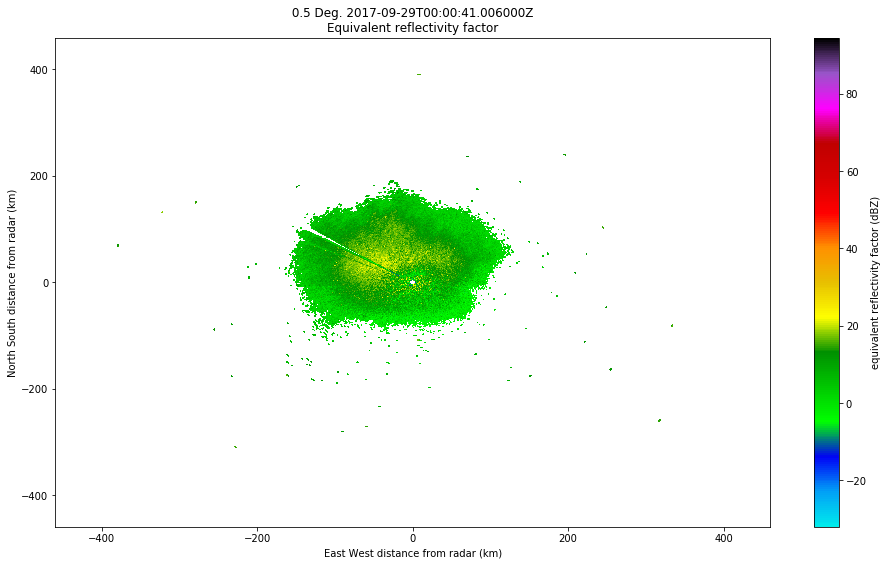

In [29]:
display = pyart.graph.RadarDisplay(radar2.extract_sweeps([0]))
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 9))
display.plot_ppi('reflectivity', ax=ax1)

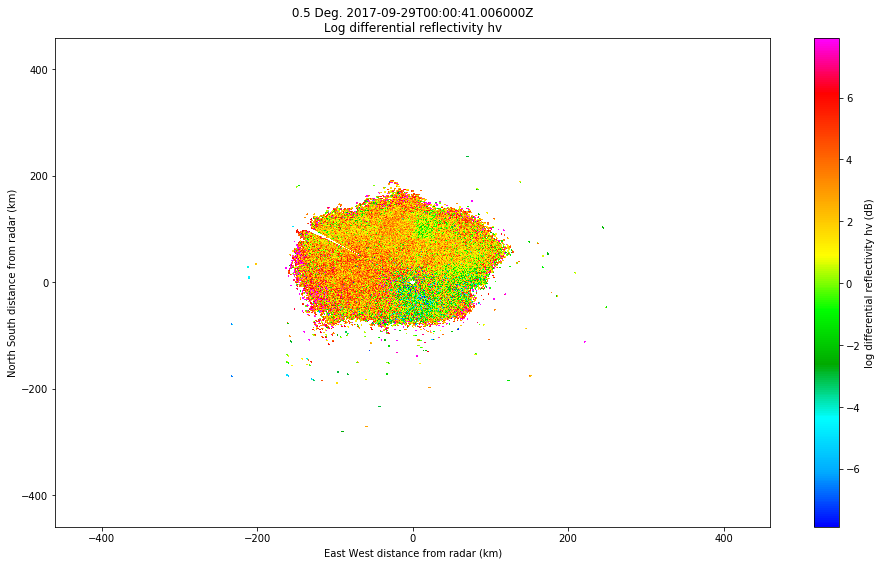

In [30]:
display = pyart.graph.RadarDisplay(radar2.extract_sweeps([0,1 ]))
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 9))
display.plot_ppi('differential_reflectivity', ax=ax1)